In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from tabs import TorsionInfoList, GetTorsionProfilesFromMDTraj
import mdtraj as md

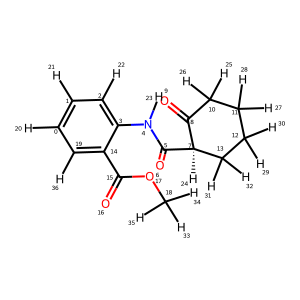

In [2]:
mol = Chem.AddHs(Chem.MolFromSmiles("[H]c1c([H])c([H])c(N([H])C(=O)[C@@]2([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C2([H])[H])c(C(=O)OC([H])([H])[H])c1[H]"))
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
mol

In [3]:
torInfo = TorsionInfoList.WithTorsionLibs(mol)

In [4]:
torInfo.smarts

['[O:1]=[C:2]!@;-[O:3]~[C:4]',
 '[$(C=O):1][NX3:2]!@;-[!#1:3][!#1:4]',
 '[O:1]=[CX3:2]!@;-[NX3H1:3][!#1:4]',
 '[C:1][CX4:2]!@;-[CX3:3]=[O:4]',
 '[$([cH0]!@;-[*^2]):1][c:2]([cH1])!@[CX3:3]=[O:4]',
 '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
 '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]']

In [5]:
torInfo.indices

[[16, 15, 17, 18],
 [5, 4, 3, 2],
 [6, 5, 4, 3],
 [8, 7, 5, 6],
 [3, 14, 15, 16],
 [7, 8, 10, 11],
 [10, 8, 7, 13],
 [8, 7, 13, 12],
 [8, 10, 11, 12],
 [7, 13, 12, 11],
 [10, 11, 12, 13]]

In [6]:
torInfo.multiplicities

[1, 4, 1, 3, 2, 3, 3, 6, 6, 3, 3]

In [7]:
torInfo.bounds

[array([3.14159265]),
 array([0.78539816, 2.35619449, 3.92699082, 5.49778714]),
 array([3.14159265]),
 array([1.04719755, 3.14159265, 5.21853446]),
 array([1.57079633, 4.71238898]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.52359878, 1.57079633, 2.60054059, 3.64773814, 4.71238898,
        5.75958653]),
 array([0.52359878, 1.57079633, 2.60054059, 3.64773814, 4.71238898,
        5.75958653]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.       , 2.0943951, 4.1887902])]

In [8]:
torInfo.torsionTypes

[<TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>]

In [9]:
customProfiles = GetTorsionProfilesFromMDTraj(md.load("../Data/CustomTABS/conformational_ensemble_smiles_id_0_openff200_tip3p_0_161311_output_stripped.h5"), torInfo.indices)
customProfiles.shape

/localhome/braunje/.conda/envs/tabs/lib/python3.10/site-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


(250000, 11)

In [10]:
import matplotlib.pyplot as plt

(array([1.22194e+05, 3.09300e+03, 1.40000e+01, 1.60000e+01, 2.80000e+01,
        2.40000e+01, 2.00000e+01, 1.30000e+01, 3.10500e+03, 1.21493e+05]),
 array([8.60080604e-07, 6.28318965e-01, 1.25663710e+00, 1.88495529e+00,
        2.51327348e+00, 3.14159155e+00, 3.76990962e+00, 4.39822769e+00,
        5.02654600e+00, 5.65486383e+00, 6.28318214e+00]),
 <BarContainer object of 10 artists>)

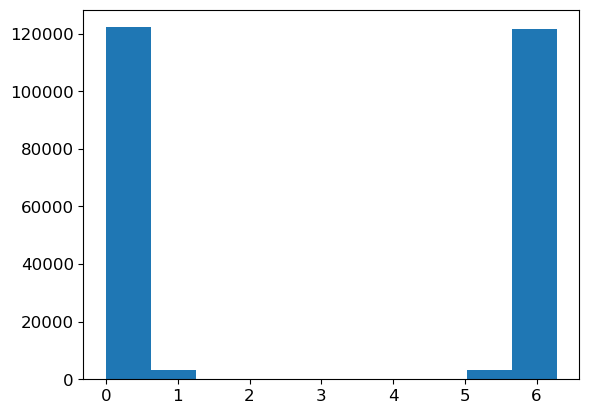

In [11]:
plt.hist(customProfiles[:,0])

In [12]:
torInfo2 = TorsionInfoList.WithCustomTorsions(mol, torInfo.indices, customProfiles)

[0]


TypeError: 'int' object is not iterable

In [13]:
torInfo2.torsionTypes

[<TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>,
 <TorsionType.USER_DEFINED: 5>]

In [14]:
torInfo2.coeffs

[array([[1.17530705, 6.28318531, 0.47910962]]),
 array([[0.47014621, 0.85674116, 0.60925877],
        [0.40397267, 5.33791667, 0.68606085]]),
 array([[1.33329157, 6.28318531, 0.42242634]]),
 array([[0.14382389, 2.03917527, 0.64542014],
        [0.48539718, 4.98750184, 0.96381055]]),
 array([[0.1180224 , 0.90095951, 0.79636909],
        [0.29188254, 2.6485354 , 0.45042613],
        [0.3319894 , 3.57943936, 0.52412501],
        [0.24594205, 5.88778026, 0.80446814]]),
 array([[0.6097465 , 0.64808151, 0.39207634],
        [0.79866539, 5.45485088, 0.40675665]]),
 array([[0.76457629, 0.85560962, 0.43131398],
        [0.58646779, 5.6600225 , 0.40233858]]),
 array([[0.65426963, 0.76871654, 0.34738964],
        [0.97502429, 5.44519777, 0.3440973 ]]),
 array([[0.95752637, 0.81554604, 0.34421304],
        [0.6841555 , 5.44827588, 0.34155116]]),
 array([[1.00737176, 0.99496874, 0.33204539],
        [0.69399069, 5.28732841, 0.32647882]]),
 array([[0.68333702, 0.99707787, 0.33472662],
        [1.005